In [1]:
%matplotlib inline
import pandas
import seaborn
import google_survey

responses = pandas.read_csv('responses.csv').set_index('question')
responses.head()

,person,response_str,response_n,response
question,,,,
q0,p36,"Libraries, Offices",0,Libraries
q0,p36,"Libraries, Offices",1,Offices
q0,p68,"Libraries, Bars, Restaurants, Offices",0,Libraries
q0,p68,"Libraries, Bars, Restaurants, Offices",1,Bars
q0,p68,"Libraries, Bars, Restaurants, Offices",2,Restaurants


In [9]:
import json
questions = pandas.read_csv('questions.csv')
questions['choices'] = questions.choices_json.apply(json.loads)
questions.head()

,title,choices_json,choices
0,Email address *,[],[]
1,How are you using Python?,"[""Software (engineering/developing)"", ""Science...","[Software (engineering/developing), Science (s..."
2,What kind(s) of events would you like to see a...,"[""Software (engineering/developing)"", ""Science...","[Software (engineering/developing), Science (s..."
3,What format(s) of events would you like to see...,"[""Presentations"", ""Hack Nights"", ""Python Schoo...","[Presentations, Hack Nights, Python Schooling,..."
4,At what skill level would you like to see even...,"[""Introductory"", ""Intermediate"", ""Expert""]","[Introductory, Intermediate, Expert]"


In [ ]:
def label_response_type(responses):
    assert len(responses.index) == 1
    question_id = responses.index[0]
    choices = questions.ix[questions.id == question_id, 'choices']
    responses['response_type'] = [x.response if x.response in choices else 'Other']
    return responses
    
responses = responses.groupby(index=True).apply(label_response_type)

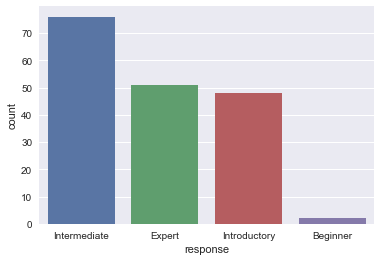

In [4]:
seaborn.countplot(responses.ix['q0', 'response_type'])

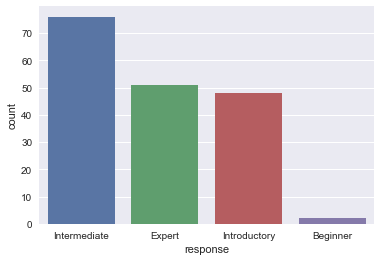

In [5]:
seaborn.countplot(responses.ix['q1', 'response'])

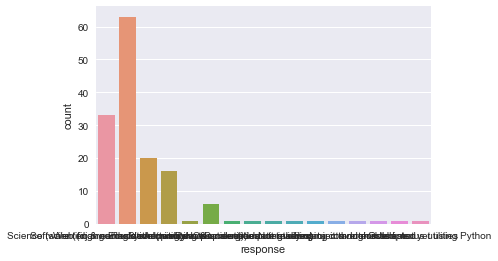

In [6]:
seaborn.countplot(responses.ix['q2', 'response'])

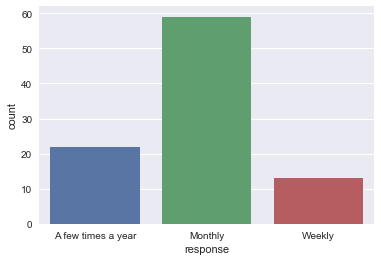

In [7]:
seaborn.countplot(responses.ix['q3', 'response'])

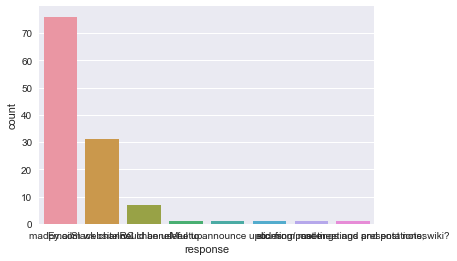

In [8]:
seaborn.countplot(responses.ix['q4', 'response'])

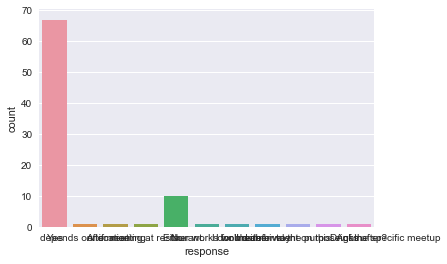

In [9]:
seaborn.countplot(responses.ix['q5', 'response'])

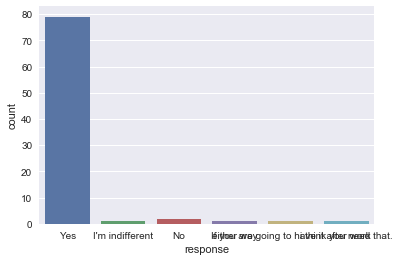

In [10]:
seaborn.countplot(responses.ix['q6', 'response'])

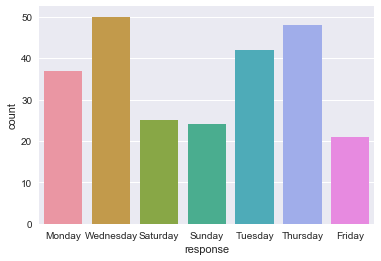

In [11]:
seaborn.countplot(responses.ix['q7', 'response'])

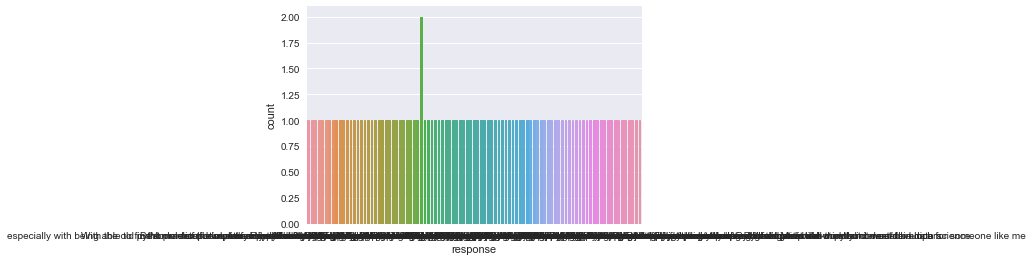

In [12]:
seaborn.countplot(responses.ix['q8', 'response'])

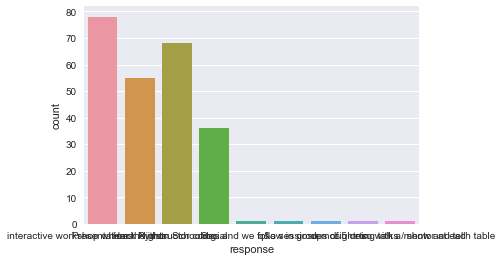

In [13]:
seaborn.countplot(responses.ix['q9', 'response'])

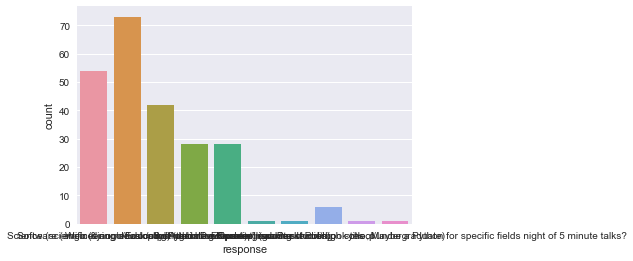

In [14]:
seaborn.countplot(responses.ix['q10', 'response'])

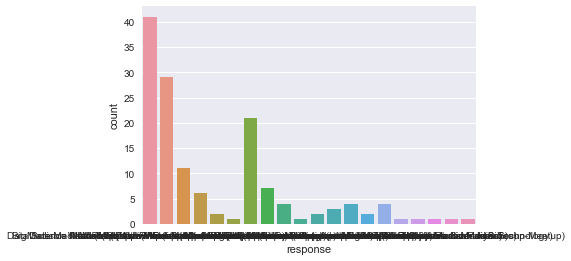

In [15]:
seaborn.countplot(responses.ix['q11', 'response'])

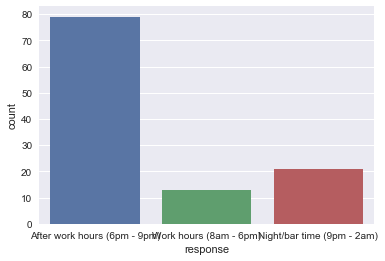

In [16]:
seaborn.countplot(responses.ix['q12', 'response'])

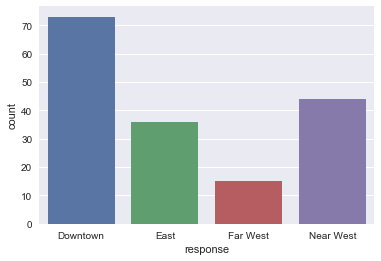

In [17]:
seaborn.countplot(responses.ix['q13', 'response'])